## Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

## Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.<br>

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

### About the Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not.

**You are provided with following 2 files:**
1. train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2. test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


### Dataset Attributes

Here is the description of all the variables:
- Variable: Definition
- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: number of contacts performed during this campaign to the client
- pdays: number of days that passed by after the client was last contacted
- previous: number of contacts performed before this campaign
- poutcome: outcome of the previous marketing campaign


### Output variable (desired target):

- Subscribed (target): has the client subscribed a term deposit? (YES/NO)

## Dataset Link

https://github.com/dsrscientist/dataset5

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


There are 9 categorical variables and 7 numeric variables.<br>
'day' and 'month' together form the date of contact and are ordinal variables.<br>
'ID' is a nominal variable which does not provide any quantitative value.<br>
'subscribed' is the output or target variable which is categorical.<br>
Rest of the variables are independent or input variables.

### Exploratory Data Analysis

In [3]:
# Getting dimensions of the dataset
df.shape

(31647, 18)

The dataset contains 31647 rows and 11 columns. Out of the 18 columns, 14 are independent variables or input variables, 1 is a nominal variable, 2 are ordinal variables and 1 is the target or output variable.

In [4]:
# Getting the column names
df.columns.to_list()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

The independent variables are:<br>
'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome'<br>

The output or target variable is:<br>
'subscribed'<br>

'ID'is nominal, while 'day' and 'month' are ordinal.

In [5]:
# Checking datatype of each column
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

The dataset has object and int64 datatypes.

In [6]:
# Checking for null values
df.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in tha dataset.

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

There are also no duplicate values in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


This gives an overview of the dataset. From here, we can see that there are no missing values in the dataset. We can also observe the datatypes.<br>

From here we can see 8 columns have int64 datatype and 10 columns have object datatype, including the target

In [9]:
# Number of unique values for each variable
df.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

As we know, the target variable is categorical.

In [10]:
# Frequency of occurence of each value in 'subscribed' column
df.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

There are many more non-subscribers than subscribers in the dataset. we need to balance the data before training the model.

#### Dataset description

In [11]:
# Statistical summary of columns (numerical data)
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations from the statistical summary:
- The variabes age, balance, duration, campaign, pdays, and previous all have mean values greater than the median. So these variables are skewed to the right.
- The variable day has median greater than the mean, but it day and mon together represent an ordinal variable.
- ID, being a nominal variable and its statistical summary is not very meaningful.

In [12]:
# Numerical columns for data visualisation
num_cols = df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']]
num_cols.columns.to_list()

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

These are the columns that will be used for numerical data visualisation.

#### Data Visualisation

In [13]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("Set2"))

no     27932
yes     3715
Name: subscribed, dtype: int64


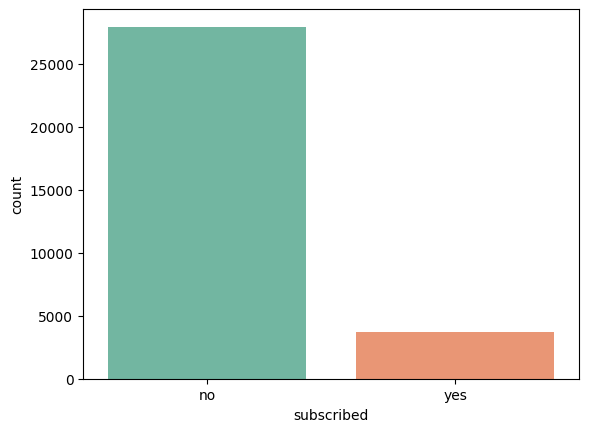

In [14]:
# Visualising the frequency of subscribed in the dataset
print(df.subscribed.value_counts())
sns.countplot(x=df.subscribed)
plt.show()

As we observed before, there are many more non-subscribers than subscribers.

Let us observe the distribution of the numerical variables.

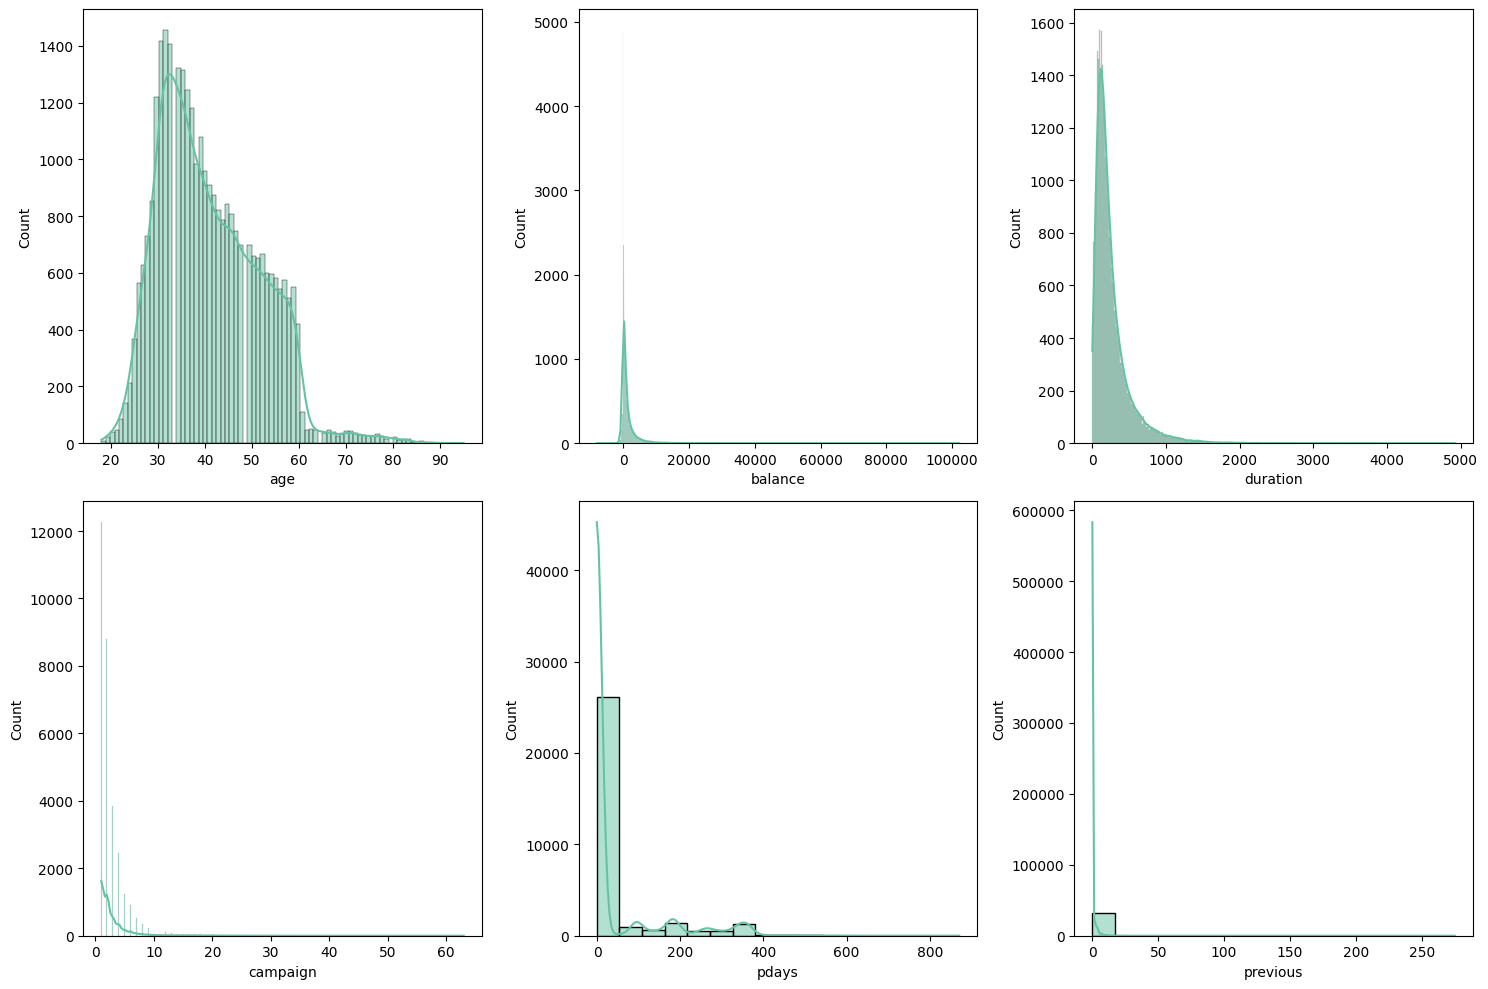

In [15]:
# Data distribution for numerical columns
plt.figure(figsize=(15, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 6:
        ax = plt.subplot(2, 3, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

- From above it is clear that age, balance, duration, campaign, pdays and previous are all skewed to the right.
- Most of the people are between the age of 30 to 40.
- The balance seems to peak even before 20000 as the mean is 1363.89. The highest balance seems to be around 80000.
- The mean duration is around 258 while the highest goes upto 5000.
- The mean is 2.7 while max value goes above 60 for campaign.
- For pdays, the mean is 39, while the median is -1 and maximum value goes beyond 800.
- For previous, the mean is 0.5, the median is 0 and maximum value is 275.

We need to explore each of variables one by one and observe how they relate to the target variable.

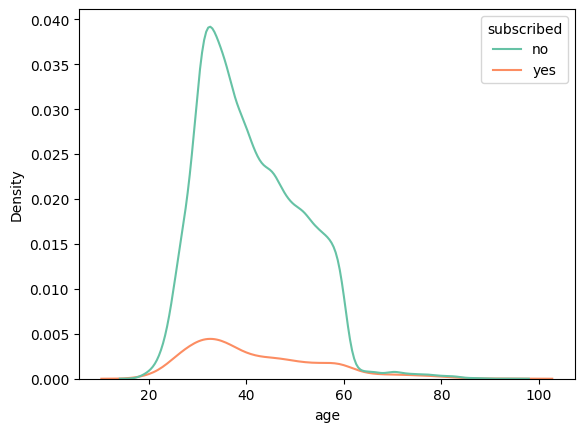

In [16]:
sns.kdeplot(x="age", data=df, hue="subscribed")
plt.show()

Majority of peple who have subscribed and not sobscribed fall in the same age group. This is because there are many people between age 30 and 40 in the dataset. Right before age 60 there seem to be more people who subscribed to the term deposit.

In [17]:
df.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

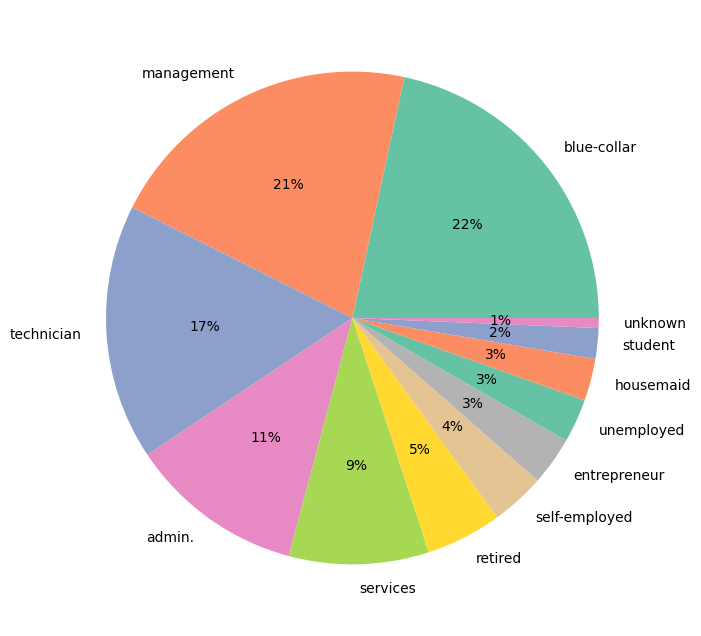

In [18]:
# Visualising the jobs in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('Set2')
  
plt.pie(df.job.value_counts(), labels=df.job.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

We can observe that majority of the people work in blue-collar, management or technician jobs.

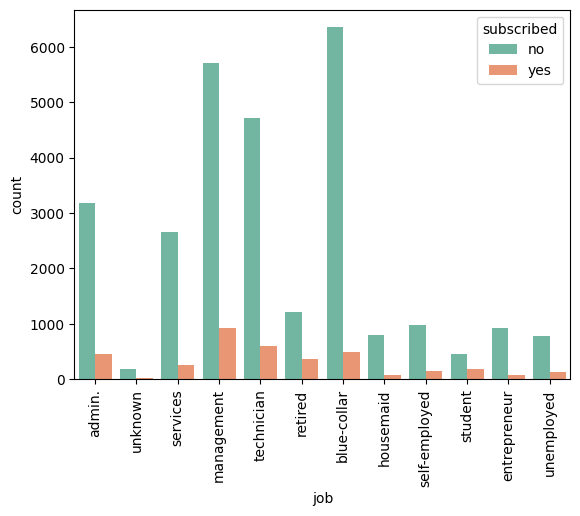

In [19]:
sns.countplot(x="job", data=df, hue="subscribed")
plt.xticks(rotation=90)
plt.show()

The maximum people who have subscribed have management jobs followed by technician jobs and blue-collar.

In [20]:
df.marital.value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

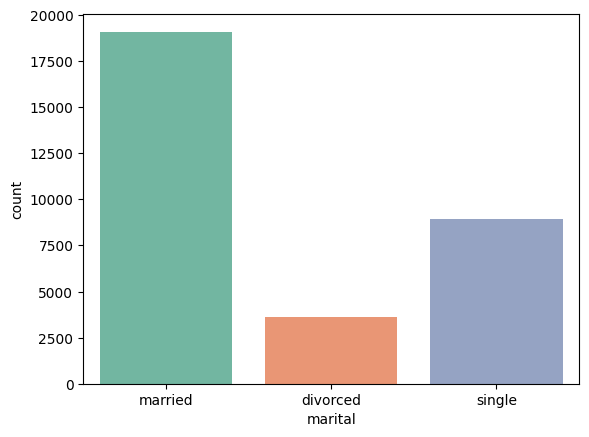

In [21]:
# Visualising marital values in bar graph
sns.countplot(x="marital", data=df)
plt.show()

Majority of the customers are married, followed by single and then divorced.

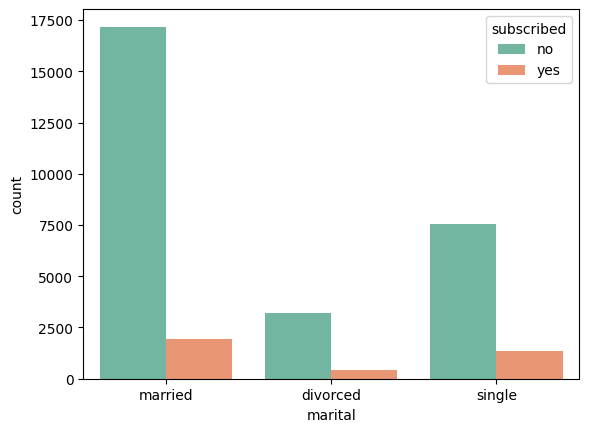

In [22]:
sns.countplot(x="marital", data=df, hue="subscribed")
plt.show()

Proportion of married people who subscribed are very less compared to proportion of single people, although the number of married people who subscribed is higher than number of single people who subscribed. Very few divorced customers subscribed to the deposit.

In [23]:
df.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

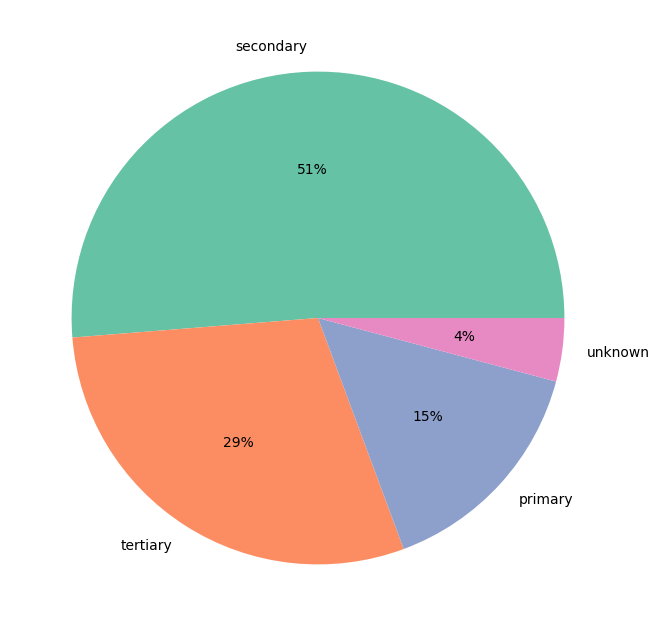

In [24]:
# Visualising the education in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('Set2')
  
plt.pie(df.education.value_counts(), labels=df.education.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

More than half the customers have secondary education, followed by tertiary educaton. 4% of the customers' education information is unknown.

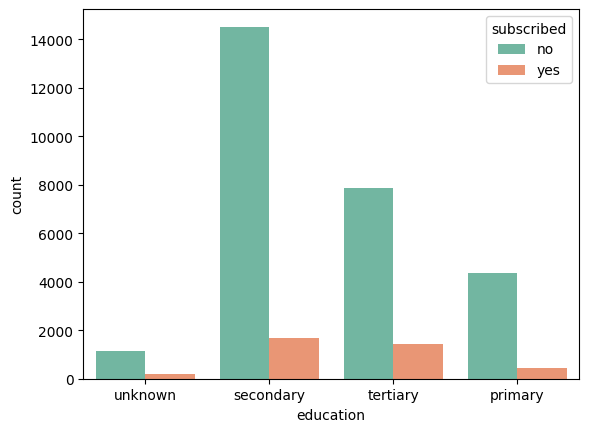

In [25]:
sns.countplot(x="education", data=df, hue="subscribed")
plt.show()

Almost same number of people with secondary as well as tertiary education have subscribed. However, since there are more customers with secondary education the proportion of secondary educated customers who subscribed is less than the proportion of tertiary customers who subscribed.

In [26]:
df.default.value_counts()

no     31062
yes      585
Name: default, dtype: int64

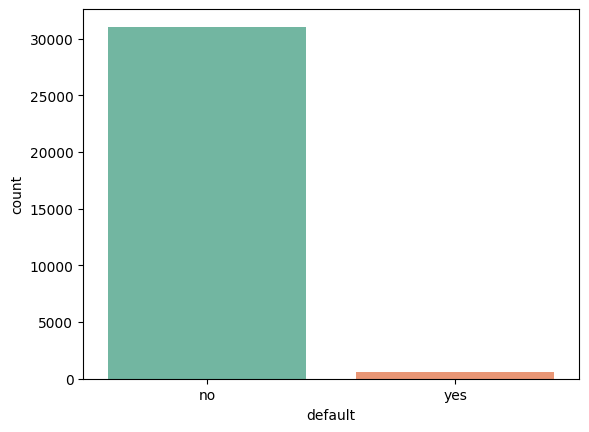

In [27]:
sns.countplot(x="default", data=df)
plt.show()

There are more non-defaulters than defaulters.

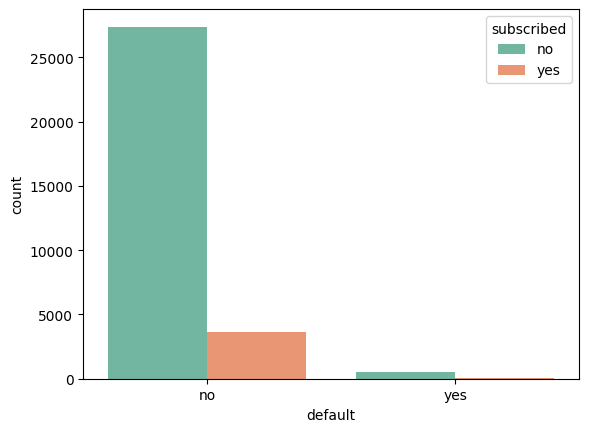

In [28]:
sns.countplot(x="default", data=df, hue="subscribed")
plt.show()

The number of non-defaulters who subscribed are higher than number of defaulters who subscribed.

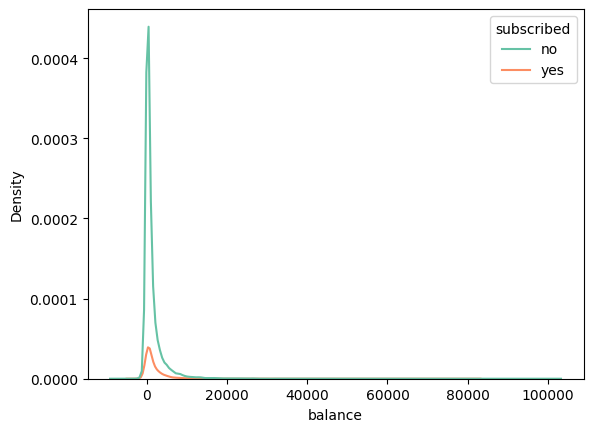

In [29]:
sns.kdeplot(x="balance", data=df, hue="subscribed")
plt.show()

Although both subscribers and non-subscribers peak at the similar balance, the number of non-subscribers is very high.

In [30]:
df.housing.value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

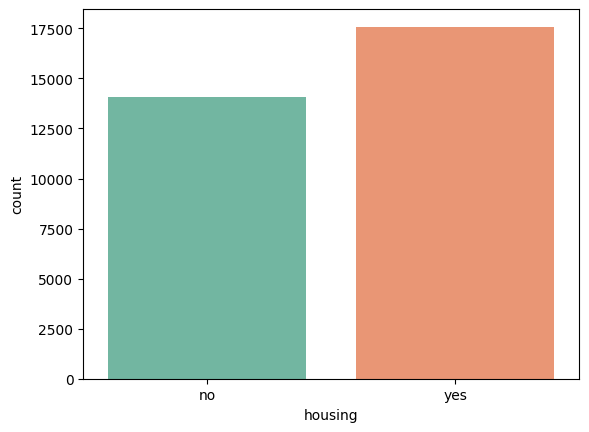

In [31]:
sns.countplot(x="housing", data=df)
plt.show()

There are more customers with housing loan than without in the dataset.

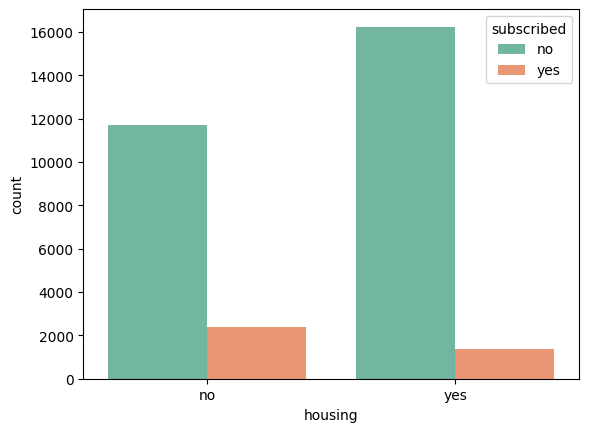

In [32]:
sns.countplot(x="housing", data=df, hue="subscribed")
plt.show()

More people with no housing loan subscribed to the term deposit compared to people with housing loan.

In [33]:
df.loan.value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

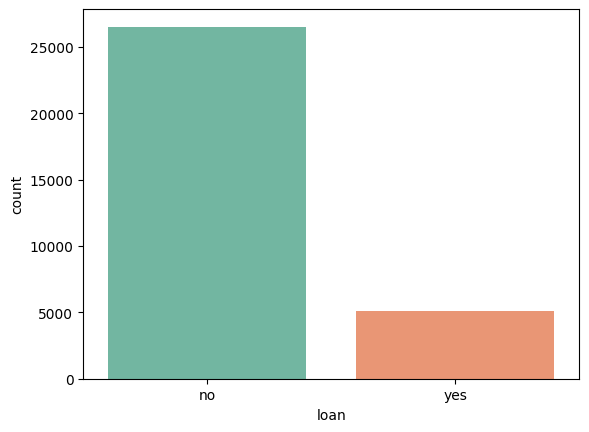

In [34]:
sns.countplot(x="loan", data=df)
plt.show()

Very few custmers have personal loans.

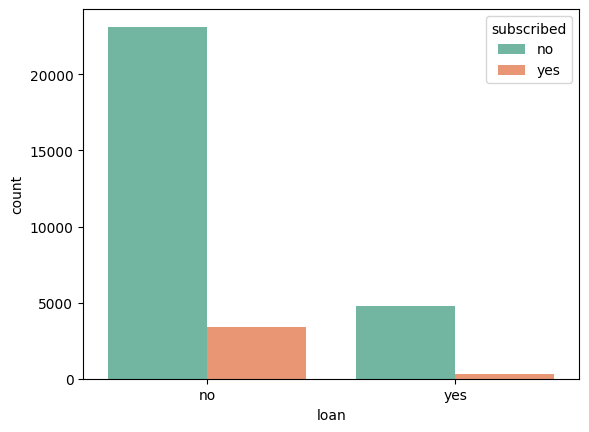

In [35]:
sns.countplot(x="loan", data=df, hue="subscribed")
plt.show()

More customers with no personal loan subscribed to the deposit.

In [36]:
df.contact.value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

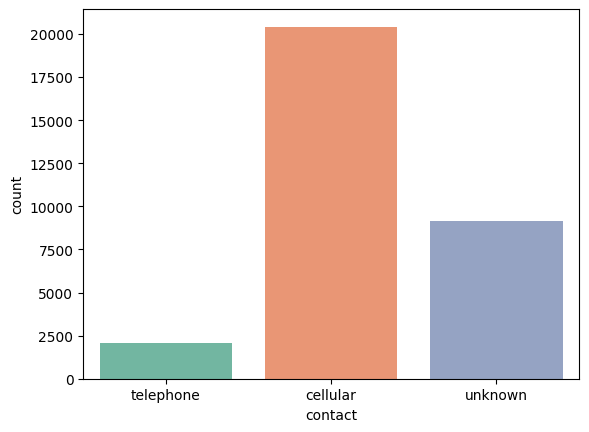

In [37]:
sns.countplot(x="contact", data=df)
plt.show()

Majority of the customers were contacted on their cellphone

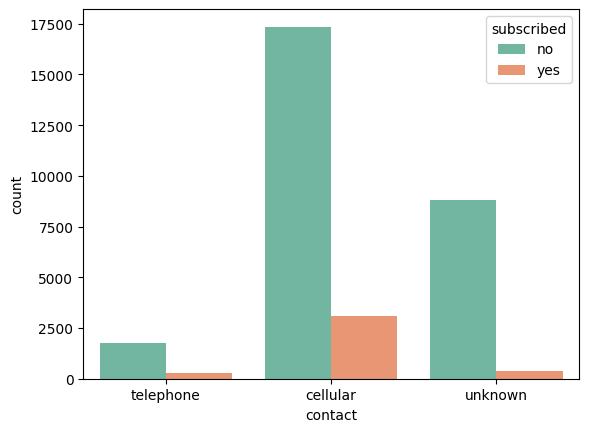

In [38]:
sns.countplot(x="contact", data=df, hue="subscribed")
plt.show()

Most people contacted on their cellulars subscribed to the deposit.

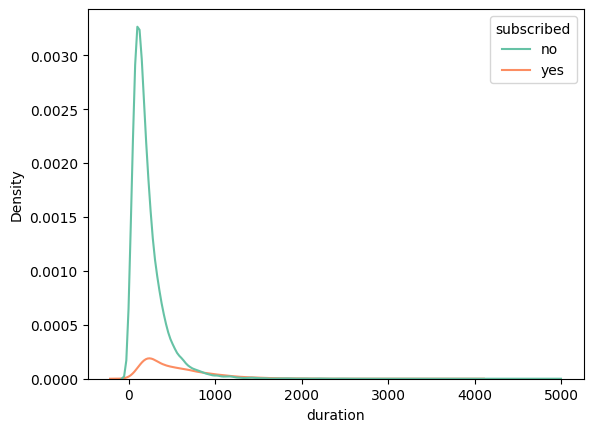

In [39]:
sns.kdeplot(x="duration", data=df, hue="subscribed")
plt.show()

Even duration seems to peak at the same value for both subscribers and non-subscribers. For duration value of 1000, there seems to be higher number of subscribers.

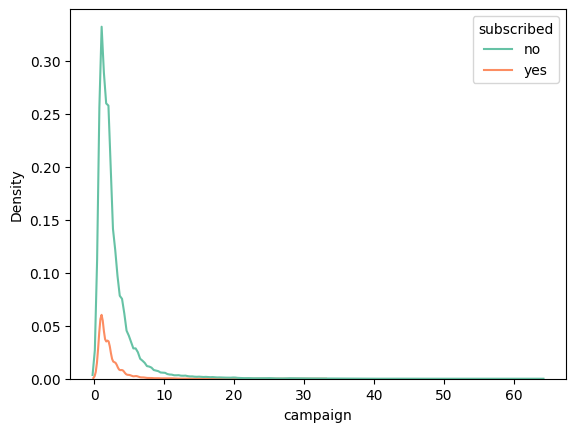

In [40]:
sns.kdeplot(x="campaign", data=df, hue="subscribed")
plt.show()

Both subscribers and non-subscribers follow the same distribution for campaign. it seems that campaign does not add any value to the subscription.

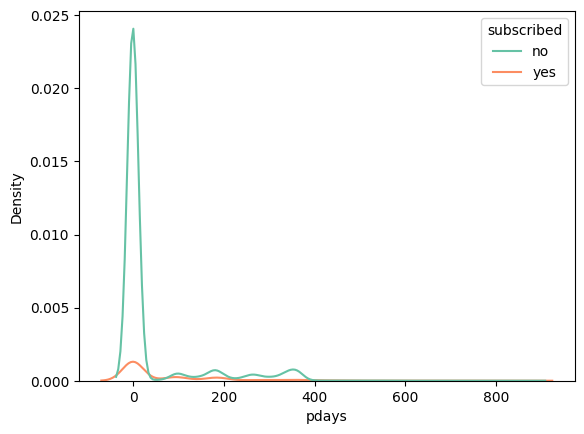

In [41]:
sns.kdeplot(x="pdays", data=df, hue="subscribed")
plt.show()

The variable pdays follows tha same distribution for both subscribed and not subscribed.

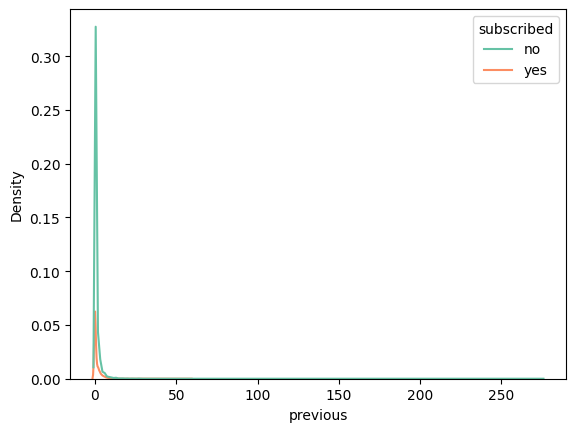

In [42]:
sns.kdeplot(x="previous", data=df, hue="subscribed")
plt.show()

The subscribers and non-subscribers follow an almost similar distribution for previous.

In [43]:
df.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

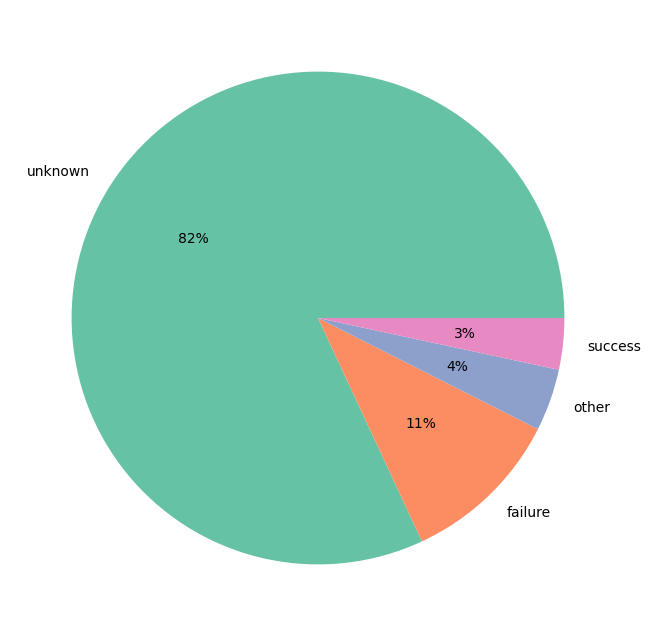

In [44]:
# Visualising the poutcome in a pie-chart

plt.figure(figsize=(8, 8))
palette_color = sns.color_palette('Set2')
  
plt.pie(df.poutcome.value_counts(), labels=df.poutcome.value_counts().index, colors=palette_color, autopct='%.0f%%')
plt.show()

Most of the poutcome values are unknown. So this variable does not provide mch information on the subscription value of previous campaigns.

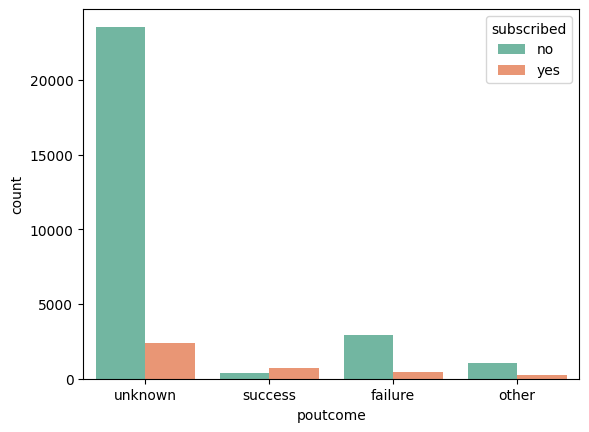

In [45]:
sns.countplot(x="poutcome", data=df, hue="subscribed")
plt.show()

From here we can observe that successful outcome of previous campaign resulted in higher subscription from those customers.

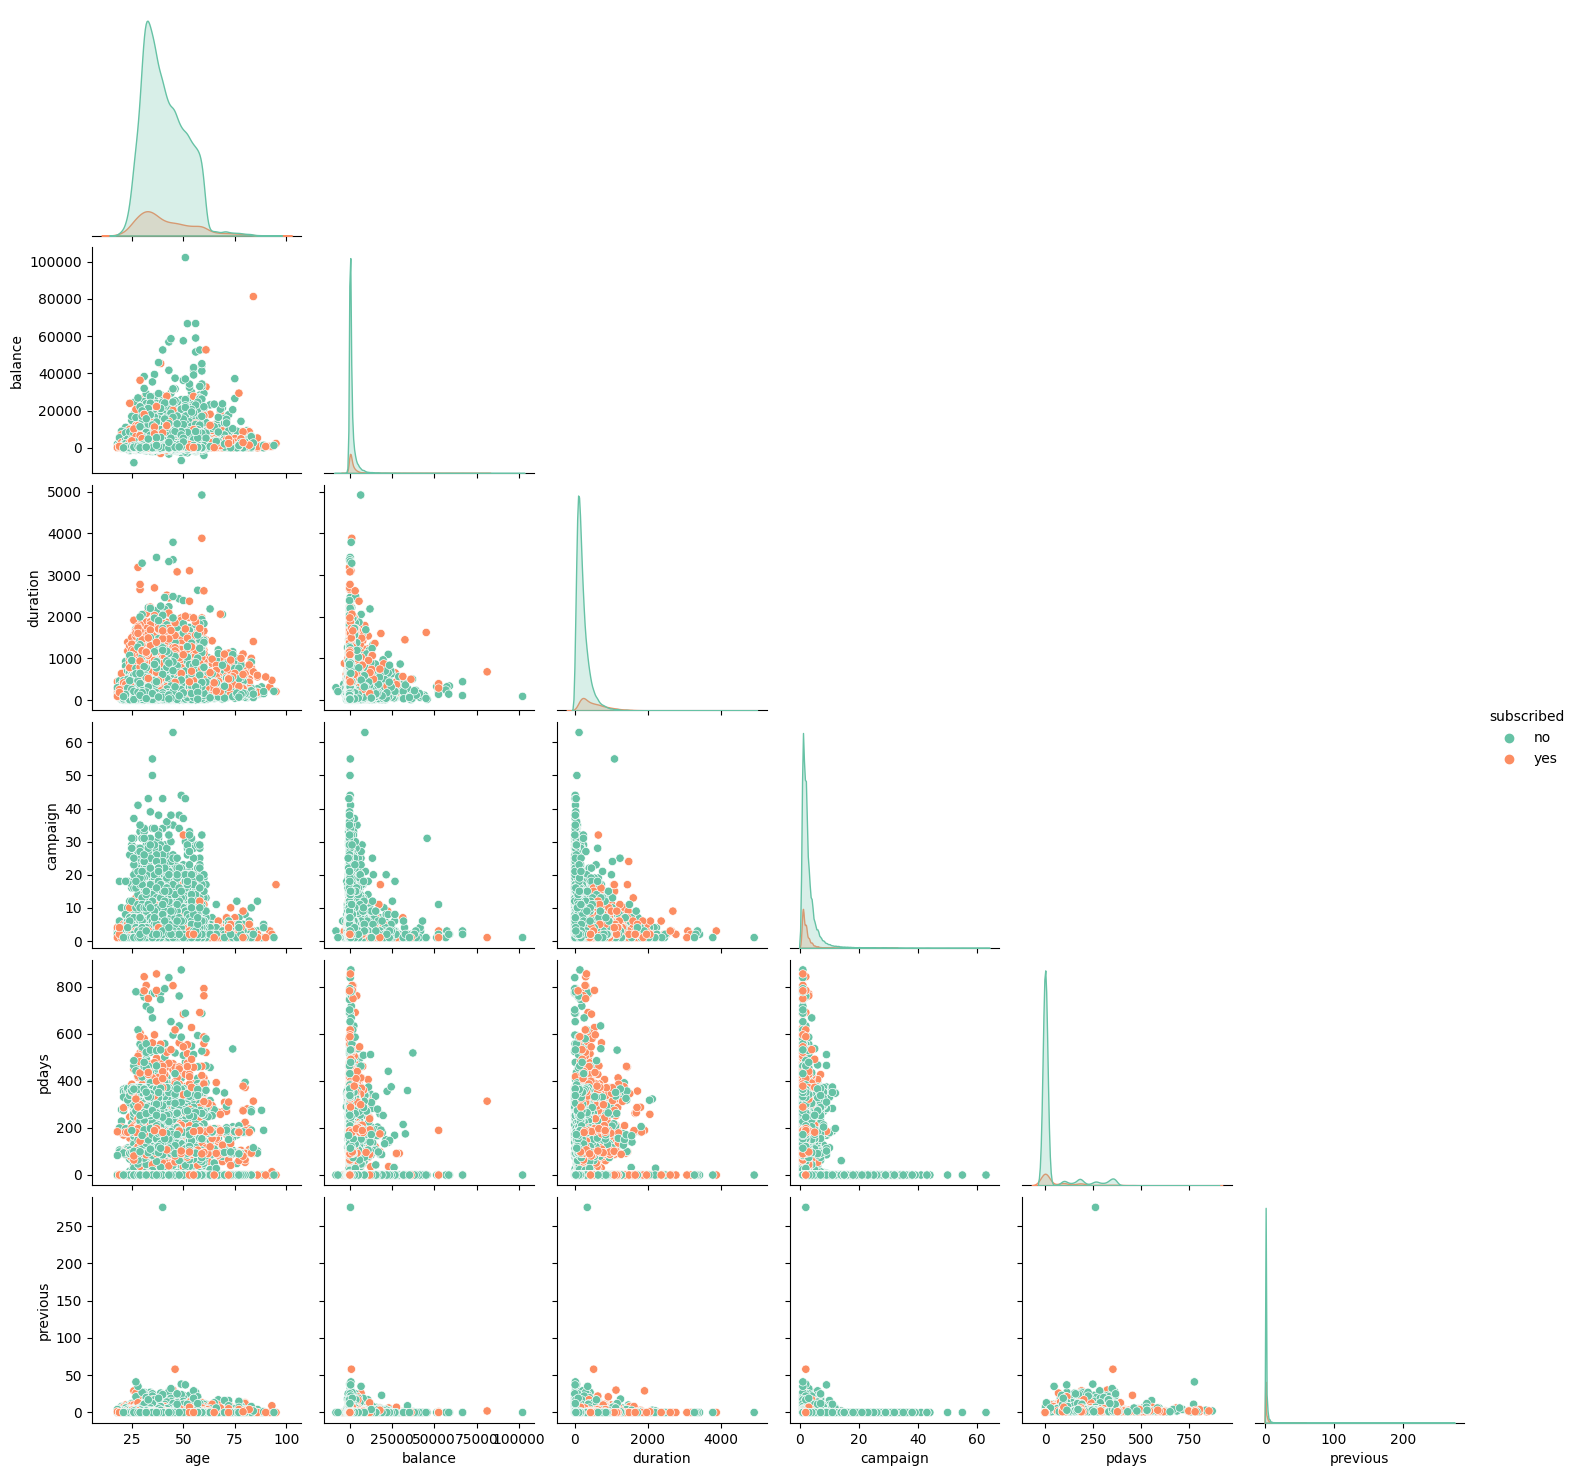

In [46]:
# Pairwise relation between variables with respect to the Glass type
sns.pairplot(df.drop(columns=['ID', 'day','month']), hue='subscribed', corner = True)
plt.show()

This shows the pairwise plot for numerical features.

### Checking for outliers

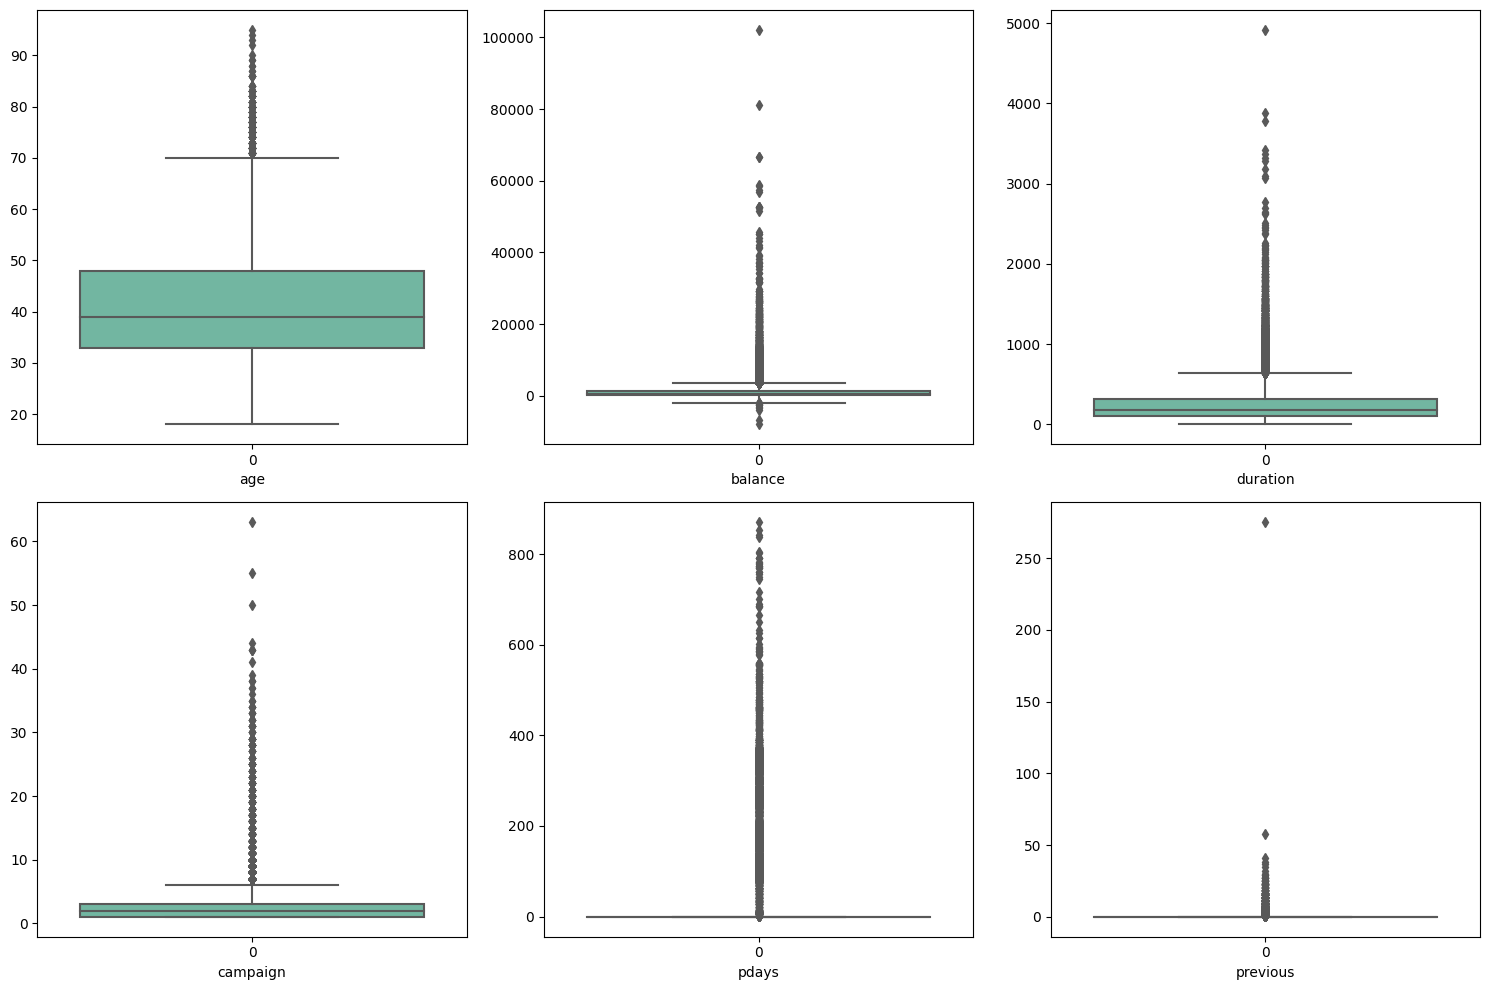

In [47]:
# Checking for outliers using boxplot
plt.figure(figsize=(15, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 6:
        ax = plt.subplot(2, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

All of the columns seem to have outliers.
- For pdays and previous, all values seem to be outliers. So removing the columns during data preprocessing would be more prudent.
- For rest of the columns we will use either Z-score or IQR methods to remove outliers , depending on the data loss in each.

#### Z-score method

In [48]:
from scipy.stats import zscore

In [49]:
out_features = num_cols.drop(columns=['pdays', 'previous'])
z = np.abs(zscore(out_features))
z

,age,balance,duration,campaign
0,1.415793,0.187933,0.832754,0.245906
1,0.937156,0.449397,0.649957,0.245906
2,1.313627,0.156159,0.070449,0.567059
3,1.509911,0.635055,2.368149,0.567059
4,0.937156,0.411091,0.474054,0.567059
...,...,...,...,...
31642,1.125392,0.450388,0.552724,0.245906
31643,1.133439,0.324903,0.699635,0.245906
31644,0.843038,0.347358,0.859979,0.075247
31645,1.509911,0.376088,0.918319,1.359859


In [50]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(29621, 18)

In [51]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

6.401870635447278

Data loss percentage is 6.4% for Z-score method.

#### IQR method

In [52]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(24339, 18)

In [53]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

23.09223623092236

Data loss percentage is 23.09%, which is very very high. Normally, we consider data loss of less than 10% only.<br>

So, we will use the z-score method to remove outliers.

In [54]:
df = df_z

In [55]:
# Numerical columns from new dataframe
num_cols = df[['age', 'balance', 'duration', 'campaign']]
num_cols.columns.to_list()

['age', 'balance', 'duration', 'campaign']

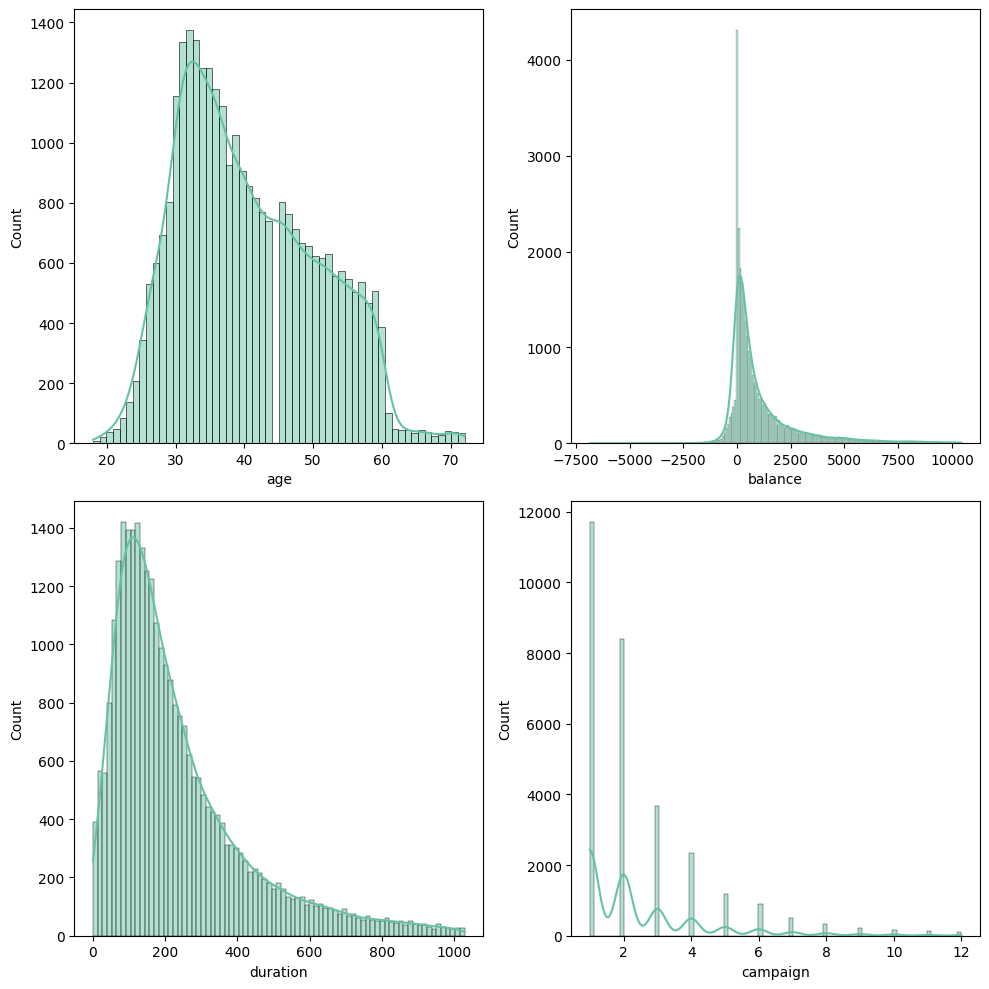

In [56]:
# Data distribution
plt.figure(figsize=(10, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(2, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The data seems more normal after removing outliers.

### Data Preprocessing

In [57]:
df.drop(columns=['ID', 'day', 'month', 'pdays', 'previous'], inplace=True)

In [58]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,44,2,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,91,2,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,240,1,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,867,1,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,380,1,unknown,no


The unnecessary columns have now been removed from the dataset.

### Checking for skewness

In [59]:
df.skew()

age         0.450185
balance     2.445199
duration    1.589653
campaign    2.060107
dtype: float64

The acceptable skewness range is between -0.5 to 0.5 (for extremely normal distributions)<br>
so, balance, duration and campaign are very highly skewed.

In [60]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [61]:
# Removing skewness
columns = ['balance', 'duration', 'campaign']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [62]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

,balance,duration,campaign
Log Transformation,NaN,NaN,0.597496
Box-Cox Transformation,NaN,-0.160154,1.043514
Inverse Transformation,NaN,NaN,0.098628
Yeo Johnson Transformation,0.216644,0.003314,0.206162
Cube Root Transformation,-0.442333,0.288186,0.996835
Square Root Transformation,NaN,0.659402,1.231444


The Yeo Johnson transformation is the most suitable one for bringing the values in acceptable range of -0.5 to 0.5.

In [63]:
# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,subscribed
0,56,admin.,married,unknown,no,860.236759,no,no,telephone,5.840734,0.649954,unknown,no
1,31,unknown,married,secondary,no,2.702489,no,no,cellular,7.563352,0.649954,unknown,no
2,27,services,married,secondary,no,436.306455,yes,no,cellular,10.334245,0.491411,unknown,no
3,57,management,divorced,tertiary,no,1369.703057,no,no,cellular,15.011896,0.491411,success,yes
4,31,technician,married,secondary,no,74.394311,yes,no,cellular,11.863057,0.491411,unknown,no


These are the transformed values.

In [65]:
df.skew()

age         0.450185
balance     0.216655
duration    0.003315
campaign    0.206173
dtype: float64

Now the skewness values are within range as well.

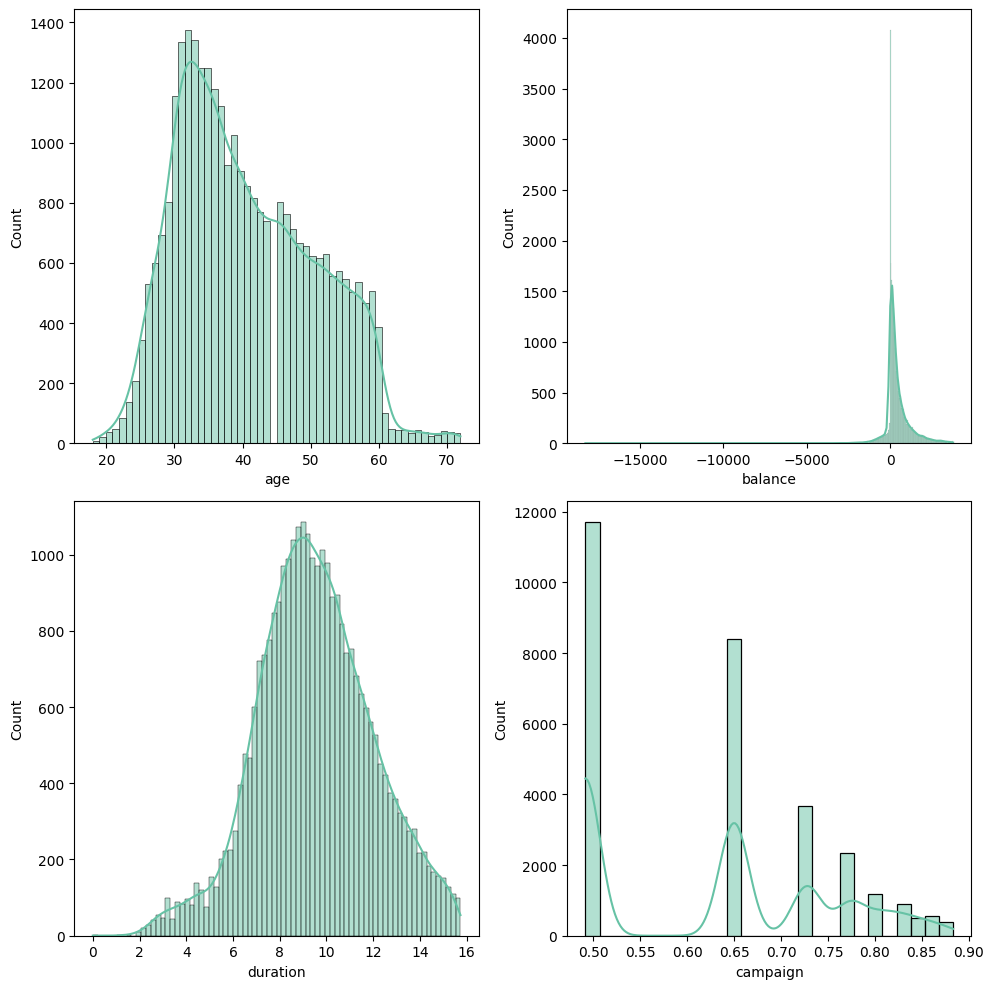

In [66]:
# Data distribution
plt.figure(figsize=(10, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 4:
        ax = plt.subplot(2, 2, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

The data is almost normalised now.

### Correlation analysis

In [67]:
df.corr()

,age,balance,duration,campaign
age,1.000000,0.083318,-0.027432,0.041728
balance,0.083318,1.000000,0.023725,-0.017746
duration,-0.027432,0.023725,1.000000,-0.095489
campaign,0.041728,-0.017746,-0.095489,1.000000


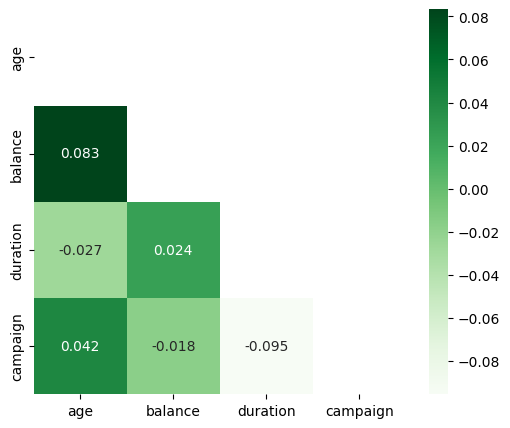

In [68]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Greens', mask=mask)
plt.show()

There seems to be almost no correlation between any of the variables.

### Encoding categorical variables

In [69]:
# Using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

In [70]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))

In [71]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,860.236759,0.0,0.0,1.0,5.840734,0.649954,3.0,0.0
1,31,11.0,1.0,1.0,0.0,2.702489,0.0,0.0,0.0,7.563352,0.649954,3.0,0.0
2,27,7.0,1.0,1.0,0.0,436.306455,1.0,0.0,0.0,10.334245,0.491411,3.0,0.0
3,57,4.0,0.0,2.0,0.0,1369.703057,0.0,0.0,0.0,15.011896,0.491411,2.0,1.0
4,31,9.0,1.0,1.0,0.0,74.394311,1.0,0.0,0.0,11.863057,0.491411,3.0,0.0


For subscribed column, no=0 and yes=1

#### Correlation analysis

In [72]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,subscribed
age,1.000000,-0.027525,-0.411899,-0.096757,-0.010361,0.083318,-0.156340,0.005710,0.034616,-0.027432,0.041728,0.016048,-0.002142
job,-0.027525,1.000000,0.066662,0.171468,-0.007707,0.026362,-0.125111,-0.035705,-0.076316,0.000789,0.009431,0.008492,0.038579
marital,-0.411899,0.066662,1.000000,0.107883,-0.011119,0.020521,-0.024945,-0.043063,-0.043795,0.015698,-0.036407,-0.020551,0.054885
education,-0.096757,0.171468,0.107883,1.000000,-0.007515,0.053328,-0.101076,-0.045607,-0.114859,0.004707,-0.012744,-0.021513,0.076124
default,-0.010361,-0.007707,-0.011119,-0.007515,1.000000,-0.165148,-0.014272,0.080042,0.014918,-0.000639,0.011549,0.035537,-0.016067
balance,0.083318,0.026362,0.020521,0.053328,-0.165148,1.000000,-0.080369,-0.124872,-0.044092,0.023725,-0.017746,-0.043955,0.077242
housing,-0.156340,-0.125111,-0.024945,-0.101076,-0.014272,-0.080369,1.000000,0.030186,0.192969,0.002599,-0.041214,-0.097260,-0.146441
loan,0.005710,-0.035705,-0.043063,-0.045607,0.080042,-0.124872,0.030186,1.000000,-0.009369,-0.005557,-0.000847,0.009739,-0.075210
contact,0.034616,-0.076316,-0.043795,-0.114859,0.014918,-0.044092,0.192969,-0.009369,1.000000,-0.038167,-0.003011,0.276399,-0.156698
duration,-0.027432,0.000789,0.015698,0.004707,-0.000639,0.023725,0.002599,-0.005557,-0.038167,1.000000,-0.095489,0.001875,0.321569


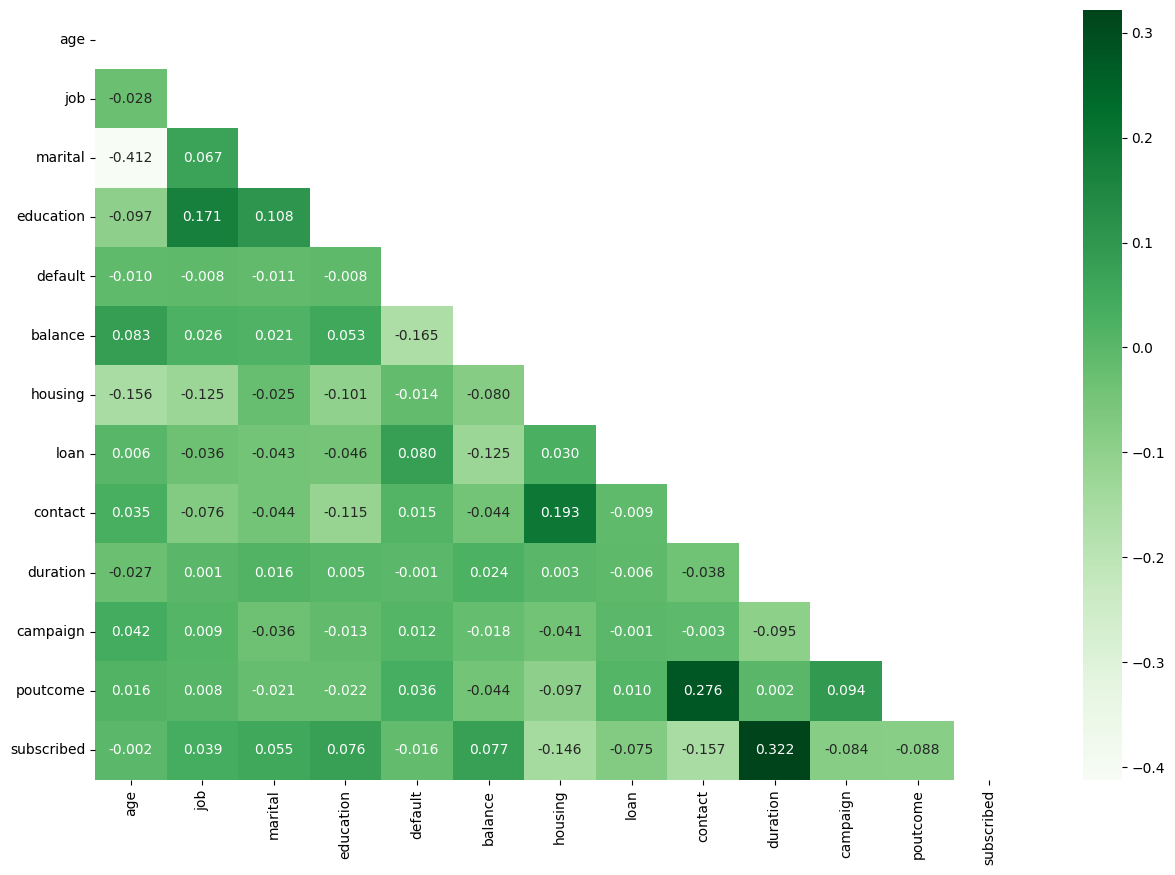

In [73]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='Greens', mask=mask)
plt.show()

All relationships are weak or moderate.<br>
The only variable with a moderate correlation with subscribed is duration.

In [74]:
df.corr()['subscribed'].sort_values(ascending=False)

subscribed    1.000000
duration      0.321569
balance       0.077242
education     0.076124
marital       0.054885
job           0.038579
age          -0.002142
default      -0.016067
loan         -0.075210
campaign     -0.083744
poutcome     -0.088003
housing      -0.146441
contact      -0.156698
Name: subscribed, dtype: float64

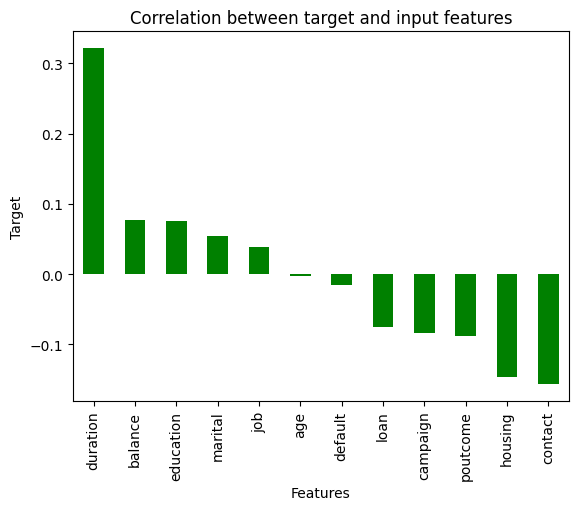

In [75]:
# Visualising the correlation between target and input features
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar', color='green')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

duration, contact and housing have the highest correlation with subscribed.

### Separating features and target

In [76]:
x = df.drop('subscribed', axis=1)
y = df['subscribed']

#### Feature scaling

In [77]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome
0,1.532586,-1.312029,-0.280275,2.389226,-0.138689,0.582987,-1.134297,-0.444557,0.395185,-1.490089,0.175061,0.445814
1,-0.951862,2.028204,-0.280275,-0.296845,-0.138689,-0.563980,-1.134297,-0.444557,-0.713631,-0.792966,0.175061,0.445814
2,-1.349374,0.813574,-0.280275,-0.296845,-0.138689,0.015973,0.881603,-0.444557,-0.713631,0.328381,-1.102934,0.445814
3,1.631964,-0.097399,-1.925219,1.046190,-0.138689,1.264407,-1.134297,-0.444557,-0.713631,2.221371,-1.102934,-0.563469
4,-0.951862,1.420889,-0.280275,-0.296845,-0.138689,-0.468091,0.881603,-0.444557,-0.713631,0.947074,-1.102934,0.445814


### Checking Variance Inflation Factor (VIF)

In [78]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,age,1.269669
1,job,1.047843
2,marital,1.228709
3,education,1.063864
4,default,1.033604
5,balance,1.061806
6,housing,1.132432
7,loan,1.024264
8,contact,1.163088
9,duration,1.012393


The VIF values should be below 5, so all values are within range.

### Model building

In [79]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [80]:
# Finding the best random state for splitting the data into training and validation sets.
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                        test_size=0.2,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_val)
    accu = accuracy_score(y_val, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 0.9022784810126582
Random state for best accuracy: 44


In [81]:
# Splitting into train-test data using best random state
x_train, x_val, y_train, y_val = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Handling Class imbalance

In [82]:
y_train.value_counts()

0.0    21200
1.0     2496
Name: subscribed, dtype: int64

There is a huge imbalance in the training data, which can affect the accuracy of the clasification model. This issue can be resolved by oversampling (creating new data for the class with less number of values).<br>

Oversampling is done after splitting the data so that we don't create any new data for testing the model.

#### Oversampling using SMOTE

In [83]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [84]:
y1.value_counts()

0.0    21200
1.0    21200
Name: subscribed, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification Models

In [85]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [86]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

,Model,Accuracy
9,CatBoost,0.905148
8,XGBoost,0.898734
5,Extra Trees,0.885570
4,Random Forest,0.882532
6,AdaBoost,0.849451
7,Gradient Boosting,0.848945
3,Decision Tree,0.844895
2,KNN,0.807595
1,Support Vector Classifier,0.802532
0,Logistic Regression,0.779747


From the above, we observe that CatBoost model performs the best with 90.5% accuracy.

#### Confusion matrices

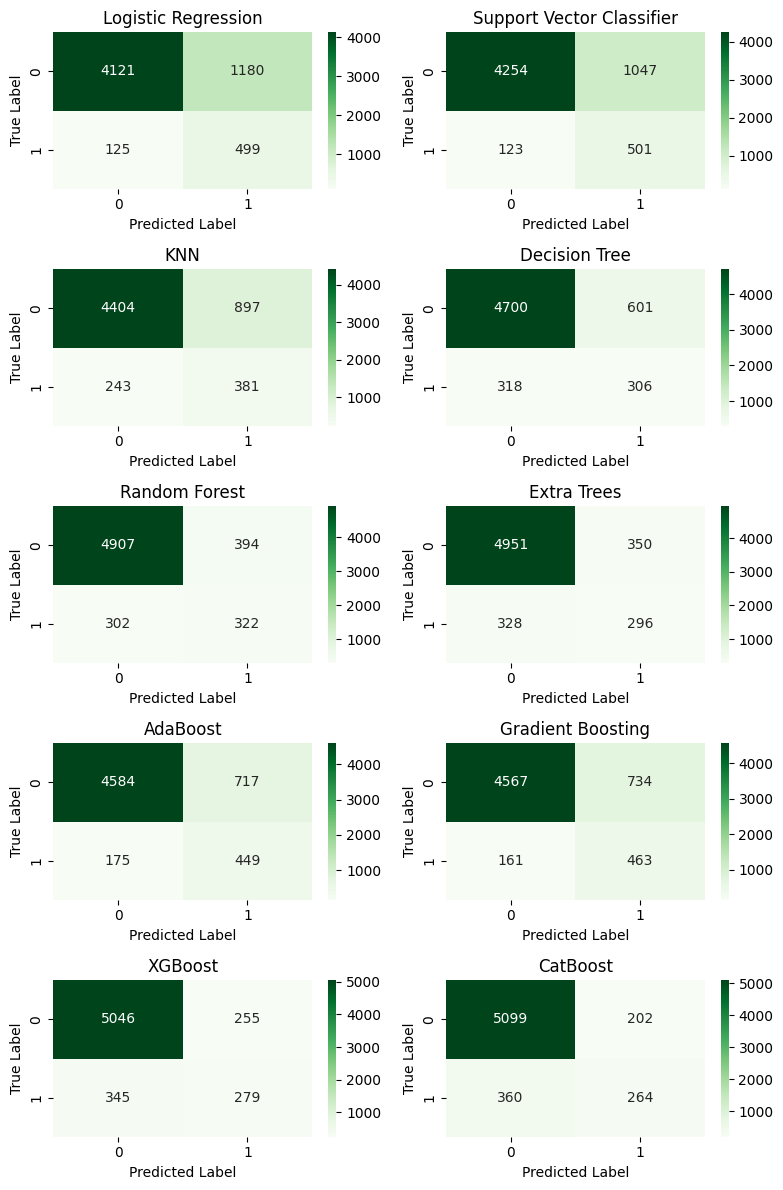

In [87]:
plt.figure(figsize=(8, 12))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(5, 2, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [88]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.97      0.78      0.86      5301
         1.0       0.30      0.80      0.43       624

    accuracy                           0.78      5925
   macro avg       0.63      0.79      0.65      5925
weighted avg       0.90      0.78      0.82      5925

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88      5301
         1.0       0.32      0.80      0.46       624

    accuracy                           0.80      5925
   macro avg       0.65      0.80      0.67      5925
weighted avg       0.90      0.80      0.84      5925

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

         0.0       0.95      0.83      0.89      5301
         1.0       0.30      0.61      0.40       624

    accura

For CatBoost model, both precision and recall values are high along with accuracy.

#### Using Cross Validation

In [89]:
from sklearn.model_selection import cross_val_score

In [90]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x1, y1, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_val)
    accuracy = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    cr = classification_report(y_val, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,CV Accuracy,Accuracy,Difference
6,AdaBoost,0.860660,0.849451,0.011209
9,CatBoost,0.924882,0.905148,0.019734
0,Logistic Regression,0.800519,0.779747,0.020772
8,XGBoost,0.926344,0.898734,0.027610
7,Gradient Boosting,0.884528,0.848945,0.035583
3,Decision Tree,0.885448,0.842025,0.043423
4,Random Forest,0.935778,0.881519,0.054259
1,Support Vector Classifier,0.858491,0.802532,0.055959
5,Extra Trees,0.950542,0.887089,0.063454
2,KNN,0.901156,0.807595,0.093561


The least overfitting model is AdaBoost Classifier. The difference between cross-validation accuracy and test accuracy is the least for this model.

#### Hyperparameter Tuning

In [91]:
from sklearn.model_selection import GridSearchCV

##### AdaBoost

In [92]:
params = {
    'random_state': [0, 5, 10, 20],
    'n_estimators': [100, 500, 700],
    'learning_rate':[0.001, 0.01, 0.1, 1.0]
}

In [93]:
gcv = GridSearchCV(AdaBoostClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [100, 500, 700],
                         'random_state': [0, 5, 10, 20]},
             scoring='accuracy')

In [94]:
best_params = gcv.best_params_
best_params

{'learning_rate': 1.0, 'n_estimators': 700, 'random_state': 0}

In [95]:
model = AdaBoostClassifier(**best_params)
model.fit(x1, y1)
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.8887763713080169


 The accuracy of the model is 88.88%.

#### Plotting ROC Curve

In [97]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

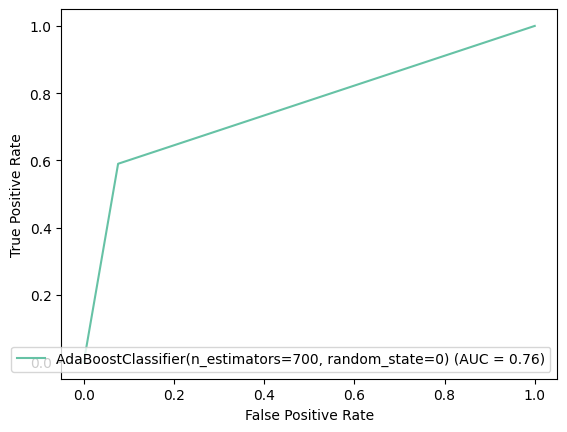

In [98]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model)
display.plot()

The AUC score of the model is 0.76

### Saving the model

In [99]:
import pickle

In [100]:
filename = 'bank_model.pkl'
pickle.dump(model, open(filename, 'wb'))

### Loading the test data

In [101]:
test_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


#### Performing all transformations and pre-processing on test data.

In [102]:
test_df.drop(columns=['ID', 'day', 'month', 'pdays', 'previous'], inplace=True)

In [103]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,20,6,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,372,1,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,676,1,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,65,2,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,111,1,unknown


The unused columns have been removed

In [105]:
# Removing skewness
columns = ['balance', 'duration', 'campaign']

# Transforming using YeoJohnson
for col in columns:
    transformed_col, _ = stats.yeojohnson(test_df[col])
    test_df[col] = transformed_col

In [106]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome
0,32,services,married,secondary,no,61.812111,yes,no,cellular,3.804908,0.812193,unknown
1,78,retired,divorced,primary,no,855.269486,no,no,telephone,9.265348,0.487790,unknown
2,31,self-employed,single,tertiary,no,73.005386,yes,no,unknown,10.702056,0.487790,unknown
3,57,services,single,primary,no,1100.072989,yes,no,telephone,5.716711,0.642970,unknown
4,45,blue-collar,divorced,secondary,no,-1867.810870,no,yes,unknown,6.709687,0.487790,unknown


Columns after value transformation.

In [108]:
for i in test_df.columns:
    if test_df[i].dtype == 'object':
        test_df[i] = oe.fit_transform(test_df[i].values.reshape(-1, 1))

In [109]:
scaler = StandardScaler()
x_test = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)
x_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome
0,-0.838114,0.807551,-0.276592,-0.301053,-0.131336,-0.349877,0.893033,-0.429564,-0.704444,-2.060474,1.484674,0.452163
1,3.499987,0.196760,-1.914173,-1.642982,-0.131336,0.636076,-1.119779,-0.429564,0.413763,0.802165,-1.105760,0.452163
2,-0.932421,0.502156,1.360988,1.040875,-0.131336,-0.335968,0.893033,-0.429564,1.531969,1.555360,-1.105760,0.452163
3,1.519549,0.807551,1.360988,-1.642982,-0.131336,0.940270,0.893033,-0.429564,0.413763,-1.058210,0.133392,0.452163
4,0.387871,-1.024823,-1.914173,-0.301053,-0.131336,-2.747632,-1.119779,2.327941,1.531969,-0.537642,-1.105760,0.452163


These are the input values to the model.

### Loading the saved model

In [110]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [113]:
len(pred)

13564

In [114]:
test_df['predictions'] = pred

In [115]:
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,predictions
0,32,7.0,1.0,1.0,0.0,61.812111,1.0,0.0,0.0,3.804908,0.812193,3.0,1.0
1,78,5.0,0.0,0.0,0.0,855.269486,0.0,0.0,1.0,9.265348,0.487790,3.0,1.0
2,31,6.0,2.0,2.0,0.0,73.005386,1.0,0.0,2.0,10.702056,0.487790,3.0,1.0
3,57,7.0,2.0,0.0,0.0,1100.072989,1.0,0.0,1.0,5.716711,0.642970,3.0,0.0
4,45,1.0,0.0,1.0,0.0,-1867.810870,0.0,1.0,2.0,6.709687,0.487790,3.0,1.0


Here, predicted value of 1 is yes, 0 is no.

In [116]:
test_df.predictions.value_counts()

1.0    12508
0.0     1056
Name: predictions, dtype: int64

In [117]:
test_df.to_csv('predictions.csv', index=False)